In [ ]:
# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: The identification of students who might need early intervention before they fail to graduate is a classification problem as the output variable (passed) is categorical  (yes, no).

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [2]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).

In [3]:
# TODO: Calculate number of students
n_students = len(student_data)

# TODO: Calculate number of features
n_features = len(student_data.drop('passed', axis = 1).columns)

# TODO: Calculate passing students
n_passed = len(student_data[student_data.passed == 'yes'])

# TODO: Calculate failing students
n_failed = len(student_data[student_data.passed == 'no'])

# TODO: Calculate graduation rate
grad_rate = (1.0 * n_passed / n_students) * 100

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [4]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [5]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [6]:
# TODO: Import any additional functionality you may need here
from sklearn.cross_validation import train_test_split

# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test  = train_test_split(X_all, y_all, test_size = num_test, random_state= 45)


# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

**Answer: ** The supervised learning models that are appropriate for this problem are Decision Tree Classifier, support vector machine and Naive Bayes classifier.  

The decision tree models are used in medicine, agriculture, finance and other sectors for variable selection or assessing the relative importance of variables (1,2,3). Support vector machines are used to solve classification problems in wide range of application domains such as text categorization and image classification (4,5). The general applications of Naive Bayes algorithm include 
email spam filtering and document categorization (6,7).

Strengths of Decision tree: Decision trees are easy to understand and interpret due to their graphical representation. Since missing values and outliers do not influence decision trees, the use of decision tree algorithm does not require any prior data manipulation or cleaning. The decision tree algorithm does not require assuming linearity in the data and can be used 
when the parameters are not linearly related. 

Weaknesses of Decision tree: Decision trees are prone to over fitting the data and require 
parameter tuning and pruning to avoid over fitting of the data. Decision trees do not 
perform well for continuous variables. 

Strengths of Support vector machine (SVM): SVM work well with clear margin of separation. It does not over-fit the data and does not make any strong assumptions on the data. 

Weaknesses of Support vector machine (SVM): SVM does not perform well with large datasets or datasets with large number of features and when the data has lot of noise.  

Strengths of Naive Bayes algorithm: Naive Bayes algorithm is easy to implement and performs 
well with big feature space. It is very efficient and can be used for both binary and 
multiclass classification problems. The Naive Bayes algorithm performs well for categorical 
features compared to numerical variables. It assumes the normal distribution for the 
numerical variables.

Weaknesses of Naive Bayes algorithm: One of the weakness of Naive Bayes algorithm is the 
assumption that all the attributes are mutually independent, which allows us to multiply the class conditional probabilities in order to compute the outcome probability. It is very 
unlikely to get a set of predictors, which are completely independent in real life. If the 
test dataset has a category for a specific variable which was not observed in the training 
dataset then the model would assign a class conditional probability equivalent to zero and 
will be unable to make a prediction.

I chose the above three algorithms due to the following: 1) The size of the dataset is small and all three chosen algorithms perform well for small datasets. 2) All the variables in the final dataset are categorical and all three algorithms work well with categorical features. 3) I would like to compare the accuracy of prediction, of target variable in the test dataset, made by the decision tree model or support vector machine model with Naive Bayes classifier since I do not know whether all the attributes are completely independent.

References
1. Lu, JingGui, Yi Liu, and Xiaoli Li. "The decision tree application in agricultural development." Artificial Intelligence and Computational Intelligence (2011): 372-379.

2. https://hbr.org/1964/07/decision-trees-for-decision-making

3. Bae, Jong-Myon. "The clinical decision analysis using decision tree." Epidemiology and health 36 (2014).

4. Chapelle, Olivier. "Support Vector Machines for Image Classification." (1998).

5. Tong, Simon, and Daphne Koller. "Support vector machine active learning with applications to text classification." Journal of machine learning research 2.Nov (2001): 45-66.

6. Sun, Tianhao. "Spam Filtering based on Naive Bayes Classification." Archive of research papers at Babes Bolyai University (2009).

7. Ramdass, Dennis, and Shreyes Seshasai. "Document classification for newspaper articles." (2009).

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [7]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    classifier = clf.fit(X_train, y_train)
    end = time()
    return classifier
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [8]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

# TODO: Initialize the three models
clf_A = train_classifier(DecisionTreeClassifier(random_state=44), X_train, y_train)
clf_B = train_classifier(svm.SVC(random_state= 50), X_train, y_train)
clf_C = train_classifier(GaussianNB(), X_train, y_train)

# TODO: Set up the training set sizes
X_train_100 = X_train[:100]
y_train_100 = y_train[:100]

X_train_200 = X_train[:200]
y_train_200 = y_train[:200]

X_train_300 = X_train[:300]
y_train_300 = y_train[:300]

# TODO: Execute the 'train_predict' function for each classifier and each training set size
# train_predict(clf, X_train, y_train, X_test, y_test)
pred_A_100 = train_predict(clf_A, X_train_100, y_train_100, X_test, y_test)
pred_A_200 = train_predict(clf_A, X_train_200, y_train_200, X_test, y_test)
pred_A_300 = train_predict(clf_A, X_train_300, y_train_300, X_test, y_test)

pred_B_100 = train_predict(clf_B, X_train_100, y_train_100, X_test, y_test)
pred_B_200 = train_predict(clf_B, X_train_200, y_train_200, X_test, y_test)
pred_B_300 = train_predict(clf_B, X_train_300, y_train_300, X_test, y_test)

pred_C_100 = train_predict(clf_C, X_train_100, y_train_100, X_test, y_test)
pred_C_200 = train_predict(clf_C, X_train_200, y_train_200, X_test, y_test)
pred_C_300 = train_predict(clf_C, X_train_300, y_train_300, X_test, y_test)

Training a DecisionTreeClassifier using a training set size of 100. . .
Made predictions in 0.0003 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0004 seconds.
F1 score for test set: 0.7344.
Training a DecisionTreeClassifier using a training set size of 200. . .
Made predictions in 0.0002 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0002 seconds.
F1 score for test set: 0.6723.
Training a DecisionTreeClassifier using a training set size of 300. . .
Made predictions in 0.0003 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0002 seconds.
F1 score for test set: 0.6720.
Training a SVC using a training set size of 100. . .
Made predictions in 0.0012 seconds.
F1 score for training set: 0.8831.
Made predictions in 0.0007 seconds.
F1 score for test set: 0.7671.
Training a SVC using a training set size of 200. . .
Made predictions in 0.0023 seconds.
F1 score for training set: 0.8693.
Made predictions in 0.0012 seconds.
F1 score for test s

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

In [ ]:
** Classifer 1 - Decision tree classifier

| Training Set Size | Pred Time (train) | Pred Time (test) | F1 Score (train)| F1 Score (test) |
| :---------------: | :---------------: | :--------------: | :-------------: | :-------------: |
| 100               |    0.0002 sec     |   0.0004 sec     |   1.0000        |  0.7344         |
| 200               |    0.0002 sec     |   0.0003 sec     |   1.0000        |  0.6723         |
| 300               |    0.0002 sec     |   0.0002 sec     |   1.0000        |  0.6720         |

** Classifer 2 - Support Vector Machine

| Training Set Size | Pred Time (train) | Pred Time (test) | F1 Score (train)| F1 Score (test) |
| :---------------: | :---------------: | :--------------: | :-------------: | :-------------: |
| 100               |     0.0070 sec    |   0.0011 sec     |   0.8831        |  0.7671         |
| 200               |     0.0029 sec    |   0.0013 sec     |   0.8693        |  0.8054         |
| 300               |     0.0059 sec    |   0.0022 sec     |   0.8645        |  0.8082         |

** Classifer 3 - Naive Bayes Classifier

| Training Set Size | Pred Time (train) | Pred Time (test) | F1 Score (train)| F1 Score (test) |
| :---------------: | :---------------: | :--------------: | :-------------: | :-------------: |
| 100               |     0.0008 sec    |    0.0004 sec    |    0.8467       |  0.7812         |
| 200               |     0.0004 sec    |    0.0003 sec    |    0.8000       |  0.7656         |
| 300               |     0.0004 sec    |    0.0003 sec    |    0.8095       |  0.7727         |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Chosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: ** I chose Support Vector Machines (SVM) as the best model based on the F1 scores computed for all three classifiers. The F1 scores (weighted average of precision and recall) computed for the SVM model for test datasets were maximum (~0.8). The decision tree model is generally the most appropriate for the dataset as it can easily handle feature interactions and we do not need to worry about missing values and outliers in the data and whether or not the data is linearly separable. Though SVM had better performance (based on F1 score) as compared to the decision tree model and naive bayes classifier, the outcome prediction time for the training dataset was lowest for the decision tree model as compared to other models. An increase in the number of features in the dataset is likely to further increase the prediction time and cost for the SVM model. Thus, in general, decision tree might be a preferred model.

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. For example if you've chosen to use a decision tree or a support vector machine, how does the model go about making a prediction?*

**Answer: ** We can predict whether a student will pass or fail or whether a student needs an intervention prior to failing to graduate based on a support vector machine model trained on previous data. 
Support vector machine model classifies data by finding the decision boundary or a hyperplane that maximizes the margin between the classes within the data. Support vectors are the vectors that define the hyperplane. When the data is not linearly separable (by a straight line or an N-dimensional hyperplane), SVM uses a kernel function to map the low-dimensional input space to a higher dimensional space in order to find a linear separating hyperplane. As shown in the image below, projecting the decision boundary found in higher dimensional space back to the original low dimensional feature space will yield a nonlinear decision boundary.

References:

http://www.cs.cmu.edu/~tom/10701_sp11/slides/Kernels_SVM_04_7_2011-ann.pdf

http://www.eric-kim.net/eric-kim-net/posts/1/kernel_trick.html

Image (shown below) was retrieved from http://www.statsoft.com/Textbook/Support-Vector-Machines

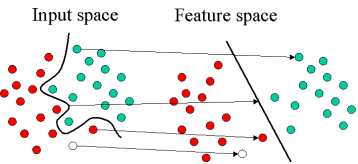

In [1]:
from IPython.display import Image
Image(filename='image_svm.png')

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [9]:
# TODO: Import 'gridSearchCV' and 'make_scorer'
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

# TODO: Create the parameters list you wish to tune
parameters = {'kernel': ['rbf', 'linear', 'poly', 'sigmoid'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 
             100, 1000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# TODO: Initialize the classifier
clf = svm.SVC(random_state= 50)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label="yes")

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=f1_scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

Made predictions in 0.0055 seconds.
Tuned model has a training F1 score of 0.8243.
Made predictions in 0.0016 seconds.
Tuned model has a testing F1 score of 0.8108.


In [ ]:
### Question 5 - Final F1 score
*What is the final model's F1 score for training and testing? How does that score compare to the untuned model?*

**Answer: ** The final F1 scores for training and test set are 0.8243 and 0.8108 respectively. The final F1 score for the training set has decreased from 0.8645 to 0.8243 after tuning the model. However, the final F1 score for the test set is approximately equal to the F1 score for the untuned model (~ 0.81).

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.